# Heart disease classification.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import numpy as np
import pandas as pd
data_path = 'heart_disease/processed.cleveland.data'
df = pd.read_csv(data_path, na_values='?', header=None, sep=',', engine='python')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',\
             'ca', 'thal', 'num']
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [2]:
# 1 age: age in years.
# 2 sex: sex (1 = male; 2 = female).
# 3 cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic).
# 4 trestbps: resting blood pressure (in mm Hg on admission to the hospital).
# 5 chol: serum cholestoral in mg/dl.
# 6 fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
# 7 restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversion and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).
# 8 thalac: maximum heart rate achieved.
# 9 exang: exercise induced angina (1 = yes; 0 = no).
# 10 oldpeak: ST depression induced by exercise relative to rest.
# 11 slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = float, 3 = downsloping).
# 12 ca: number of major vessels (0-3) colored by fluorosopy.
# 13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.
# 14 num: diagnosis of heart disease (angiographic disease status; 0: < 50% diameter narrowing; 1: > 50% diameter narrowing).

### Missing data.

In [3]:
na = df.isna().sum()
print(f'Number of missing data:\n{na}')

Number of missing data:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [4]:
df_clean = df.dropna().copy()
df_clean.shape

(297, 14)

In [5]:
# num = 0 --> no heart disease.
# num = 1, 2, 3, 4 --> heart disease present.
# Binarizzazione.
df_clean['target'] = (df_clean['num'] > 0).astype(int)
print(df_clean['target'].value_counts())

target
0    160
1    137
Name: count, dtype: int64


In [6]:
# Separazione.
X = df_clean.drop(columns=['num', 'target'])
y = df_clean['target']
X.shape, y.shape

((297, 13), (297,))

### Gaussian Naïve Bayes and AUC of the ROC.

In [7]:
from sklearn.model_selection import StratifiedKFold
k = 5
k_fold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [9]:
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')
print("AUC scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())
print("Std AUC:", auc_scores.std())

AUC scores: [0.93638393 0.890625   0.82986111 0.88425926 0.92592593]
Mean AUC: 0.893411044973545
Std AUC: 0.037507326031961524


In [10]:
# A Gaussian Naïve Bayes classifier was trained and evaluated using 5-fold stratified cross-validation
# on the UCI Heart Disease dataset, achieving a mean ROC-AUC of 0.89 with low variance (std 0.04),
# suggesting robust and consistent performance.

### ROC curve.
Curve corresponding to the best-performing fold during cross-validation.

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
best_auc = 0
for train_idx, test_idx in k_fold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pos_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pos_prob)

    if auc > best_auc:
        best_auc = auc
        best_y_test = y_test
        best_pos_prob = pos_prob
# In questo modo si sono ottenuti i migliori auc, y_test e pos_prob.

In [12]:
# fpr: false positive rate.
# tpr: true positive rate.
fpr, tpr, _ = roc_curve(best_y_test, best_pos_prob)

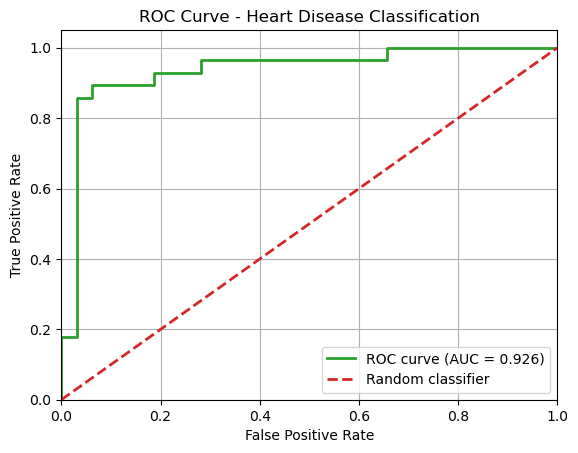

In [13]:
import matplotlib.pyplot as plt
plt.figure()
line_width = 2
model_color = 'tab:green'
baseline_color = 'tab:red'
plt.plot(fpr, tpr, color=model_color, lw=line_width, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color=baseline_color, lw=line_width, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Classification')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Each execution of cross-validation represents an independent experimental evaluation of the model's
# generalization performance: this explains why a different run yielded an AUC of 0.926 instead of the previous 0.936.